In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from keras import callbacks
import pandas as pd
import seaborn as sns

In [2]:
(X_train, y_train), (X_test , y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

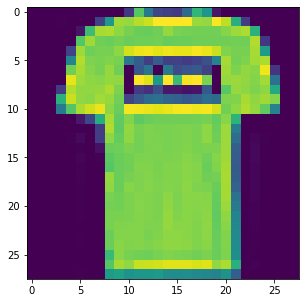

In [5]:
plt.figure(figsize=(10,5))
plt.imshow(X_train[1])
plt.show()

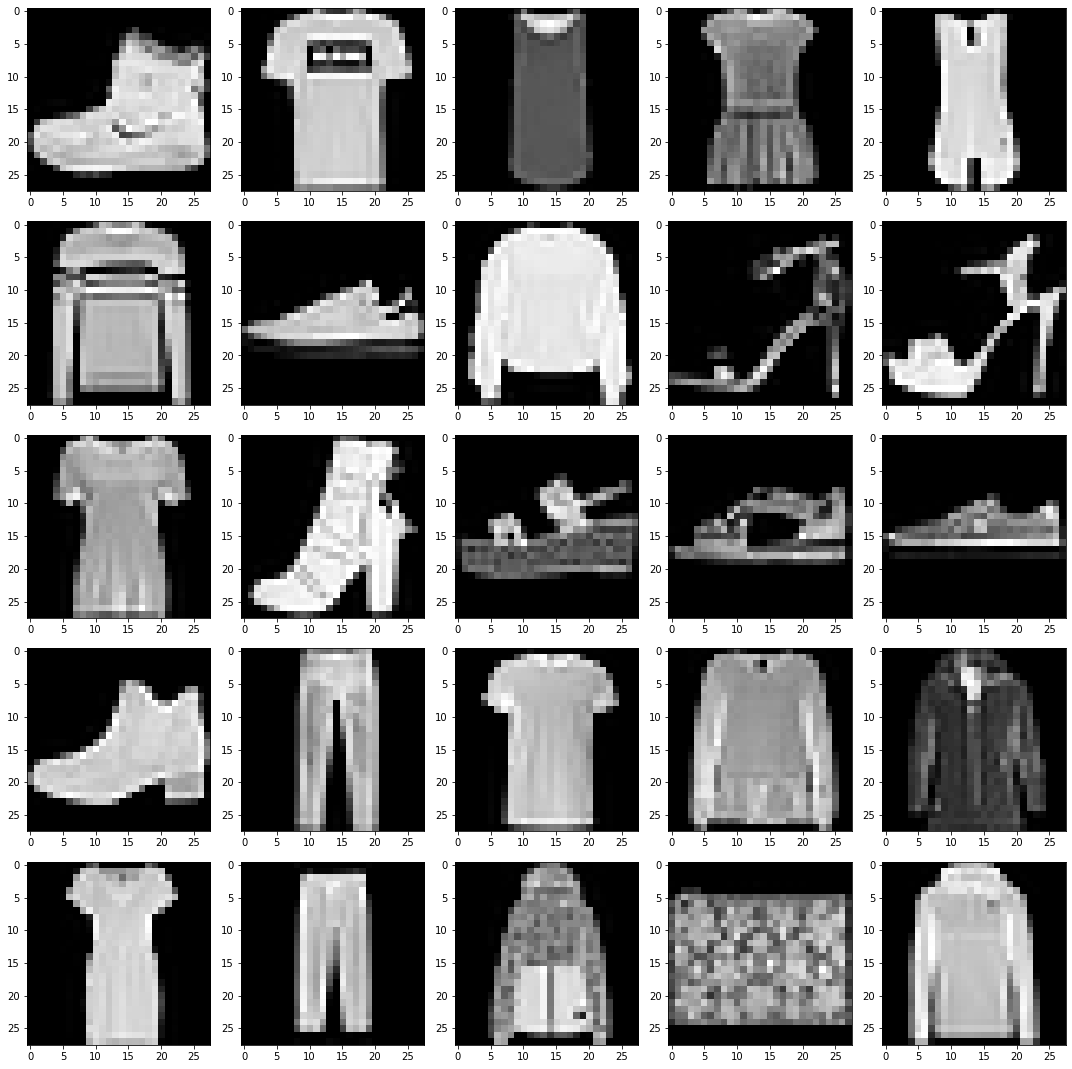

In [6]:
plt.figure(figsize=(15,15))
# plot first few images
for i in range(25):
    #define subplot
    plt.subplot(5,5,i+1)
    #plot raw pixel data
    plt.imshow(X_train[i].reshape(28,28), cmap='gray',interpolation='none')
    plt.tight_layout()
#show the figure
plt.show()

#### Data Preprocessing

In [7]:
train_images = X_train.astype('float32')
test_images = X_test.astype('float32')

train_images = train_images / 255
test_images = test_images / 255

In [8]:
batch_size = 200

categories = list(set(y_train))
categories = np.array(categories)
categories_length = len(categories)
num_classes = categories_length

epochs = 150

#input image dimensions
input_shape = (28, 28, 1)

#### ANN

In [9]:
model_ann = Sequential()
model_ann.add(Flatten(input_shape=input_shape))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(128, activation='relu'))
model_ann.add(Dense(128, activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(256, activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(512, activation='relu'))
model_ann.add(Dropout(0.3))
model_ann.add(Dense(num_classes, activation='softmax'))

In [10]:
model_ann.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

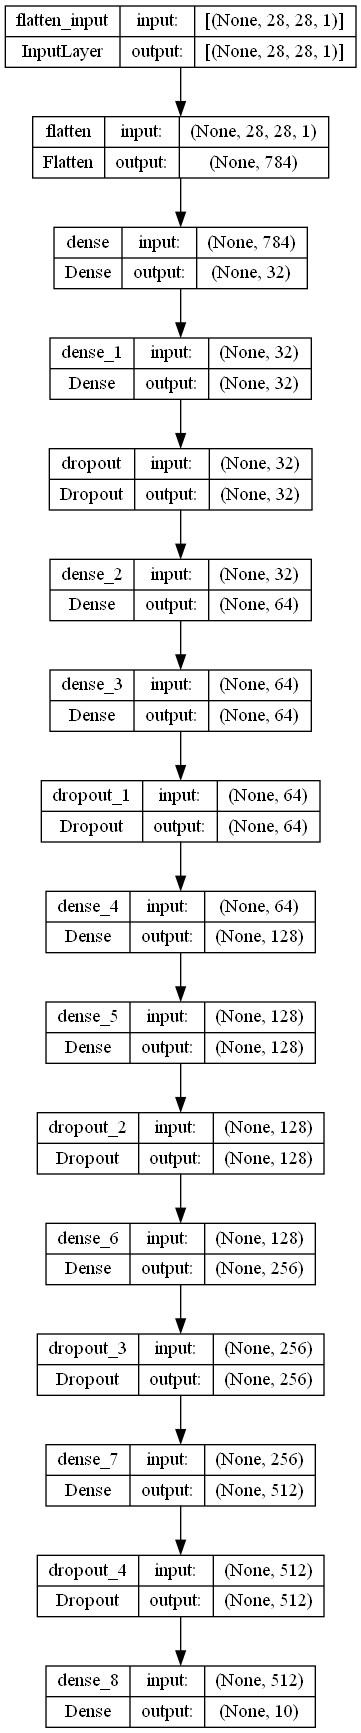

In [12]:
keras.utils.plot_model(model_ann, to_file='model_ann.png', show_shapes=True)

In [13]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.0001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model_ann.fit(train_images, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3, verbose=1, callbacks=[early_stopping])

Epoch 1/150
210/210 [==============================] - 5s 8ms/step - loss: 1.0355 - accuracy: 0.5878 - val_loss: 0.6027 - val_accuracy: 0.7659
Epoch 2/150
210/210 [==============================] - 1s 6ms/step - loss: 0.6254 - accuracy: 0.7695 - val_loss: 0.5183 - val_accuracy: 0.8167
Epoch 3/150
210/210 [==============================] - 1s 5ms/step - loss: 0.5530 - accuracy: 0.8029 - val_loss: 0.4710 - val_accuracy: 0.8339
Epoch 4/150
210/210 [==============================] - 1s 5ms/step - loss: 0.5019 - accuracy: 0.8232 - val_loss: 0.4451 - val_accuracy: 0.8398
Epoch 5/150
210/210 [==============================] - 1s 5ms/step - loss: 0.4756 - accuracy: 0.8336 - val_loss: 0.4345 - val_accuracy: 0.8474
Epoch 6/150
210/210 [==============================] - 1s 5ms/step - loss: 0.4615 - accuracy: 0.8385 - val_loss: 0.4137 - val_accuracy: 0.8529
Epoch 7/150
210/210 [==============================] - 1s 5ms/step - loss: 0.4391 - accuracy: 0.8449 - val_loss: 0.4126 - val_accuracy: 0.8480

In [14]:
scores = model_ann.evaluate(test_images, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3771 - accuracy: 0.8701


In [15]:
for i, m in enumerate(model_ann.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))


loss: 0.377

accuracy: 0.870


In [16]:
metrics_ann = pd.DataFrame(history.history)

In [17]:
metrics_ann.head()

,loss,accuracy,val_loss,val_accuracy
0,1.035485,0.587810,0.602744,0.765944
1,0.625417,0.769452,0.518316,0.816722
2,0.553010,0.802905,0.470992,0.833889
3,0.501906,0.823238,0.445149,0.839833
4,0.475570,0.833595,0.434545,0.847389


In [18]:
training_loss, training_accuracy = model_ann.evaluate(train_images, y_train)
testing_loss, testing_accuracy = model_ann.evaluate(test_images, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3771 - accuracy: 0.8701


In [19]:
print(f"Train Loss: {training_loss}")
print(f"Train Accuracy: {training_accuracy}")

print(f"Test Loss: {testing_loss}")
print(f"Test Accuracy: {testing_accuracy}")

Train Loss: 0.288117378950119
Train Accuracy: 0.8979166746139526
Test Loss: 0.37710440158843994
Test Accuracy: 0.8701000213623047


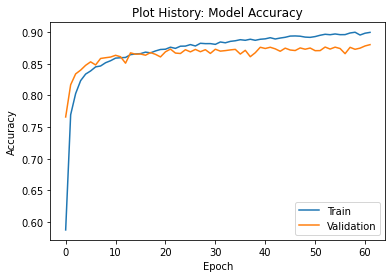

In [20]:
# plot the accuracy and loss
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Plot History: Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

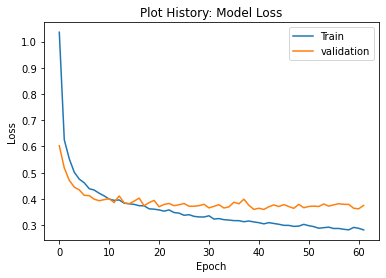

In [21]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Plot History: Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper right')
plt.show()

In [22]:
predictions_prob = model_ann.predict(test_images)
# predictions_prob[0]
predictions = np.argmax(predictions_prob, axis=1)
print(classification_report(y_test,predictions))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.75      0.84      0.79      1000
           3       0.82      0.91      0.87      1000
           4       0.81      0.74      0.78      1000
           5       0.95      0.96      0.95      1000
           6       0.70      0.62      0.66      1000
           7       0.94      0.94      0.94      1000
           8       0.97      0.95      0.96      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



#### Confusion Matrix

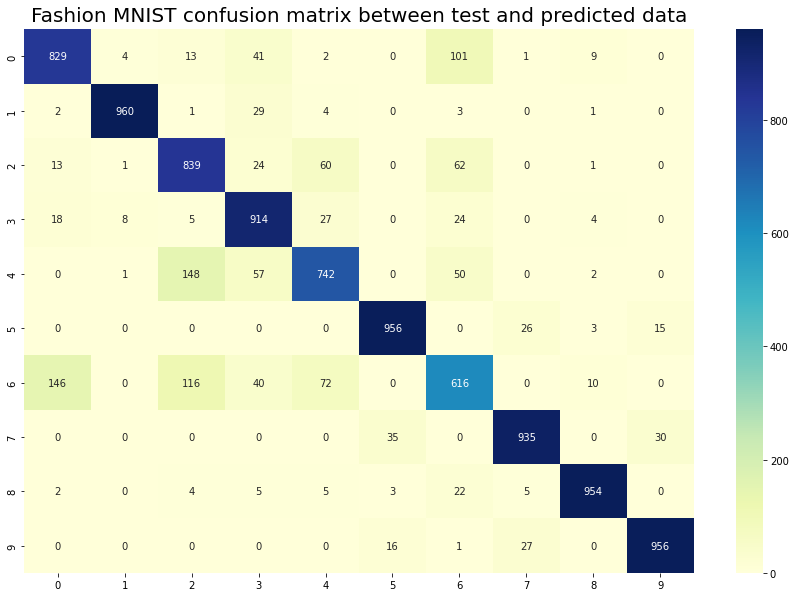

In [23]:
plt.figure(figsize=(15, 10))
heatmap_ = sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='d', cmap="YlGnBu")
heatmap_.set_title('Fashion MNIST confusion matrix between test and predicted data', fontdict={'fontsize':20}, pad=8 ,color='black')
plt.show()

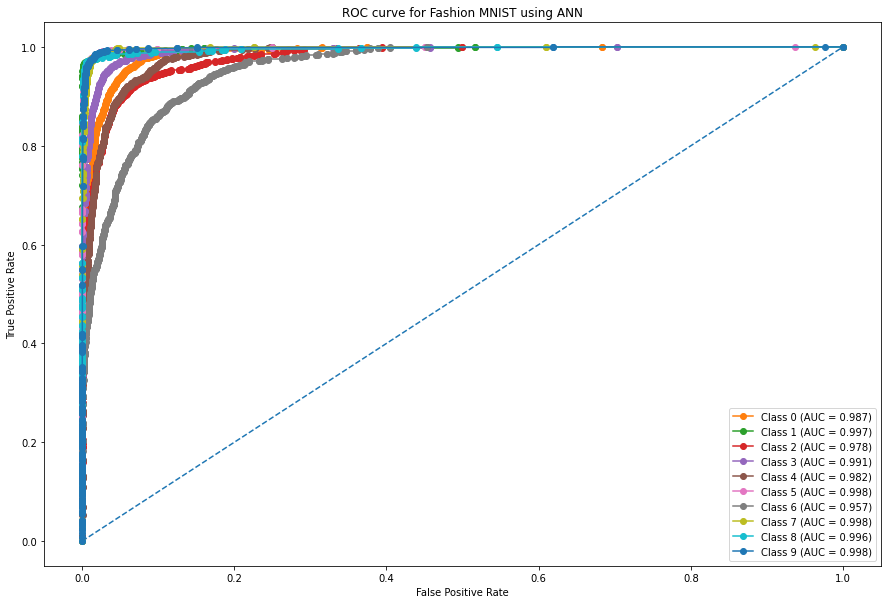

In [24]:
# Assuming y_test and yhat are properly formatted for multi-class classification
n_class = num_classes

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_class):
    # Create a one-vs-rest binary label for the current class
    y_true = (y_test == i).astype(int)
    
    # Get predicted probabilities for the current class
    y_score = predictions_prob[:, i]
    
    fpr[i], tpr[i], _ = roc_curve(y_true, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(15, 10))

# Plot the random ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')

# Plot ROC curves for each class
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], marker='o', label=f"Class {i} (AUC = {roc_auc[i]:.3f})")

plt.title('ROC curve for Fashion MNIST using ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.legend(loc='lower right')
plt.show()


In [25]:
predictions = predictions[:10000]
y_test = y_test[:10000]
correct = np.nonzero(predictions==y_test)[0]
incorrect = np.nonzero(predictions!=y_test)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 8701
Incorrect predicted classes: 1299


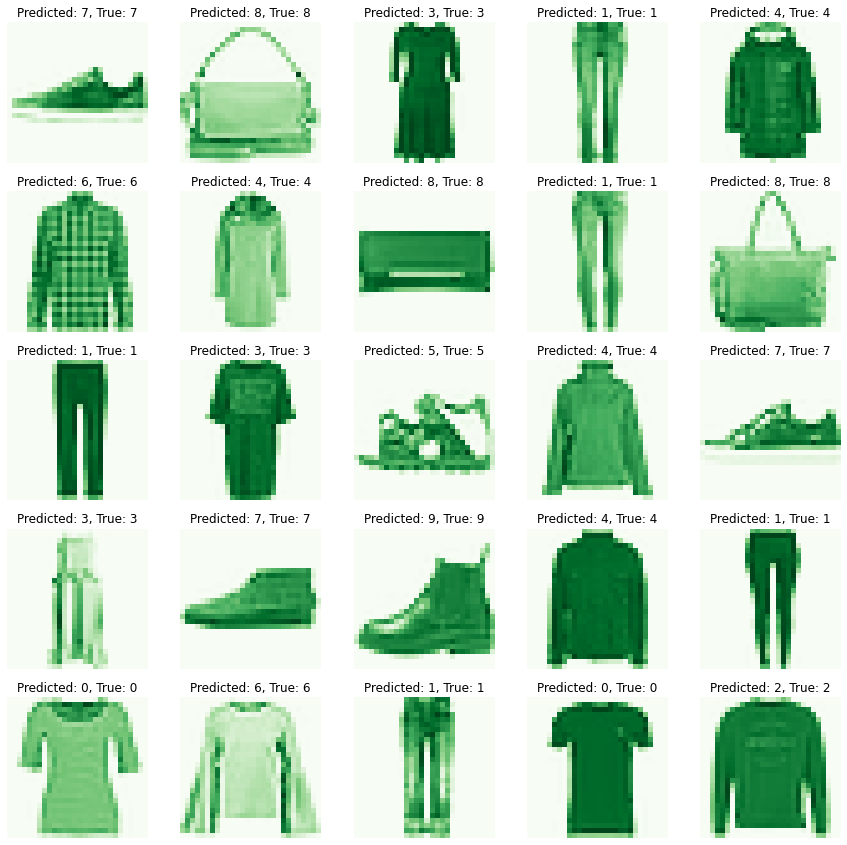

In [26]:
# Create a random sample of 10 indices from 0 to 10,000
random_indices = np.random.choice(correct, 25)
plt.figure(figsize=(15, 15))
for i, correct_index in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[correct_index].reshape(28, 28), cmap='Greens', interpolation='none')
    plt.title(f"Predicted: {predictions[correct_index]}, True: {y_test[correct_index]}")
    plt.axis('off')
plt.show()

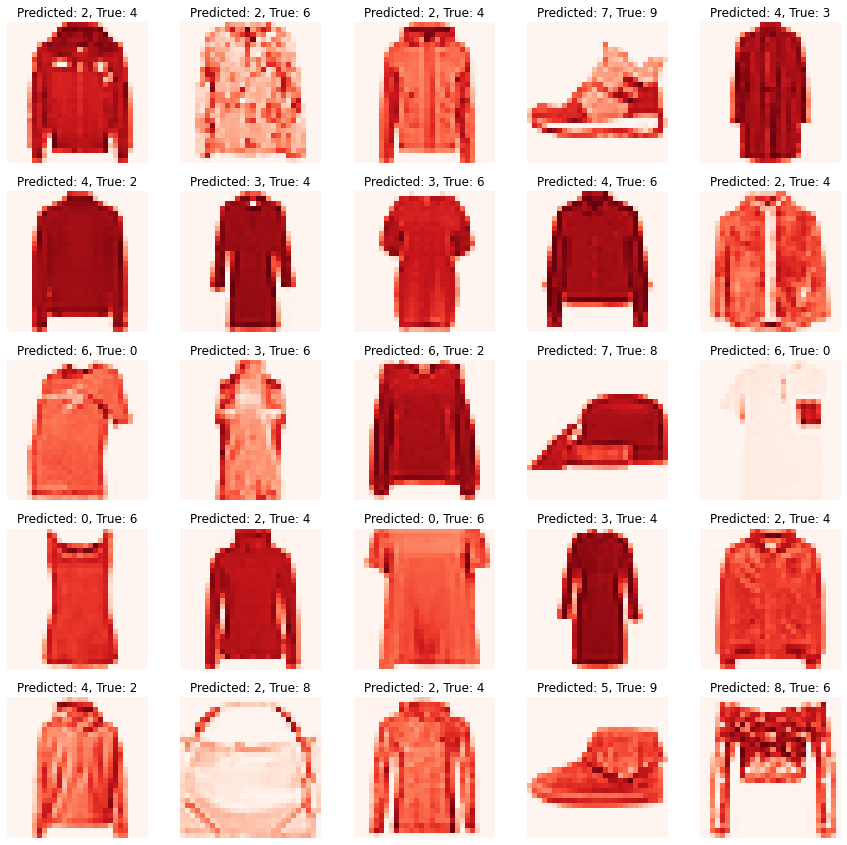

In [27]:
# Create a random sample of 10 indices from 0 to 10,000
random_indices = np.random.choice(incorrect, 25)
plt.figure(figsize=(15, 15))
for i, incorrect_index in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[incorrect_index].reshape(28, 28), cmap='Reds', interpolation='none')
    plt.title(f"Predicted: {predictions[incorrect_index]}, True: {y_test[incorrect_index]}")
    plt.axis('off')
plt.show()

#### CNN

In [28]:
model_cnn = Sequential()
model_cnn.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.20))
model_cnn.add(Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(Dropout(0.20))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(Dropout(0.20))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(Dropout(0.20))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(num_classes, activation='softmax'))

In [29]:
model_cnn.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [30]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 dropout_5 (Dropout)         (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 dropout_6 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                  

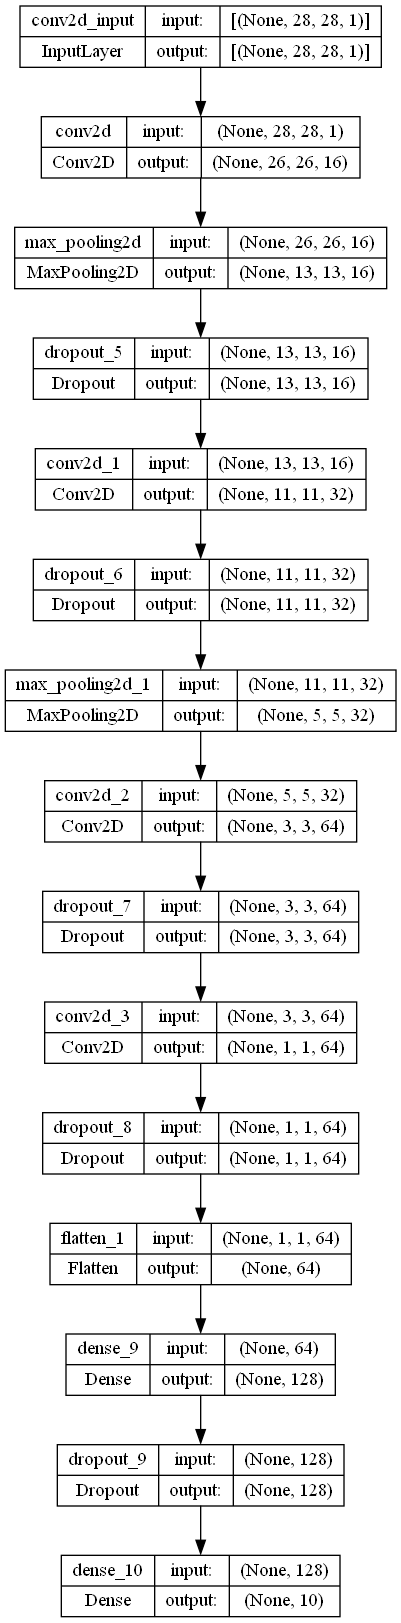

In [31]:
keras.utils.plot_model(model_cnn, to_file='model_cnn.png', show_shapes=True)

In [32]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.0001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)


history = model_cnn.fit(train_images, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3, verbose=1, callbacks=[early_stopping])

Epoch 1/150
210/210 [==============================] - 17s 13ms/step - loss: 0.9462 - accuracy: 0.6463 - val_loss: 0.5713 - val_accuracy: 0.7852
Epoch 2/150
210/210 [==============================] - 1s 6ms/step - loss: 0.5840 - accuracy: 0.7819 - val_loss: 0.4743 - val_accuracy: 0.8302
Epoch 3/150
210/210 [==============================] - 1s 7ms/step - loss: 0.5088 - accuracy: 0.8155 - val_loss: 0.4218 - val_accuracy: 0.8475
Epoch 4/150
210/210 [==============================] - 1s 6ms/step - loss: 0.4573 - accuracy: 0.8344 - val_loss: 0.3804 - val_accuracy: 0.8642
Epoch 5/150
210/210 [==============================] - 1s 7ms/step - loss: 0.4227 - accuracy: 0.8479 - val_loss: 0.3485 - val_accuracy: 0.8748
Epoch 6/150
210/210 [==============================] - 1s 7ms/step - loss: 0.3966 - accuracy: 0.8564 - val_loss: 0.3356 - val_accuracy: 0.8790
Epoch 7/150
210/210 [==============================] - 1s 6ms/step - loss: 0.3749 - accuracy: 0.8647 - val_loss: 0.3287 - val_accuracy: 0.88

In [33]:
scores = model_cnn.evaluate(test_images, y_test)

313/313 [==============================] - 4s 9ms/step - loss: 0.2394 - accuracy: 0.9138


In [34]:
for i, m in enumerate(model_cnn.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))


loss: 0.239

accuracy: 0.914


In [35]:
metrics_cnn = pd.DataFrame(history.history)

In [36]:
metrics_cnn.head()

,loss,accuracy,val_loss,val_accuracy
0,0.946220,0.646262,0.571282,0.785167
1,0.583963,0.781857,0.474256,0.830167
2,0.508798,0.815500,0.421797,0.847500
3,0.457321,0.834405,0.380382,0.864167
4,0.422738,0.847857,0.348531,0.874778


In [37]:
training_loss, training_accuracy = model_cnn.evaluate(train_images, y_train)
testing_loss, testing_accuracy = model_cnn.evaluate(test_images, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2394 - accuracy: 0.9138


In [38]:
print(f"Train Loss: {training_loss}")
print(f"Train Accuracy: {training_accuracy}")

print(f"Test Loss: {testing_loss}")
print(f"Test Accuracy: {testing_accuracy}")

Train Loss: 0.16203564405441284
Train Accuracy: 0.9425833225250244
Test Loss: 0.23937036097049713
Test Accuracy: 0.9138000011444092


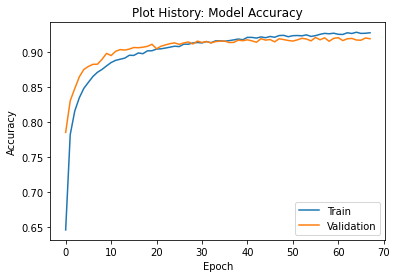

In [39]:
# plot the accuracy and loss
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Plot History: Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

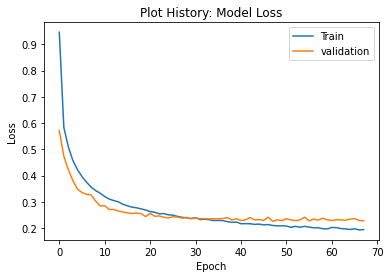

In [40]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Plot History: Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper right')
plt.show()

In [41]:
# predictions_prob = model_cnn.predict(X_test)
# predictions_prob[:, 0]

In [42]:
# predictions_prob[:, 0]

In [43]:
# predictions_prob[0].argmax()

In [44]:
# predictions = np.argmax(predictions_prob, axis=1)
# predictions[0:5]

In [45]:
predictions_prob = model_cnn.predict(test_images)
# predictions_prob[0]
predictions = np.argmax(predictions_prob, axis=1)
print(classification_report(y_test,predictions))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.88      0.87      0.87      1000
           3       0.92      0.91      0.92      1000
           4       0.84      0.90      0.87      1000
           5       0.99      0.96      0.98      1000
           6       0.77      0.73      0.75      1000
           7       0.95      0.98      0.97      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



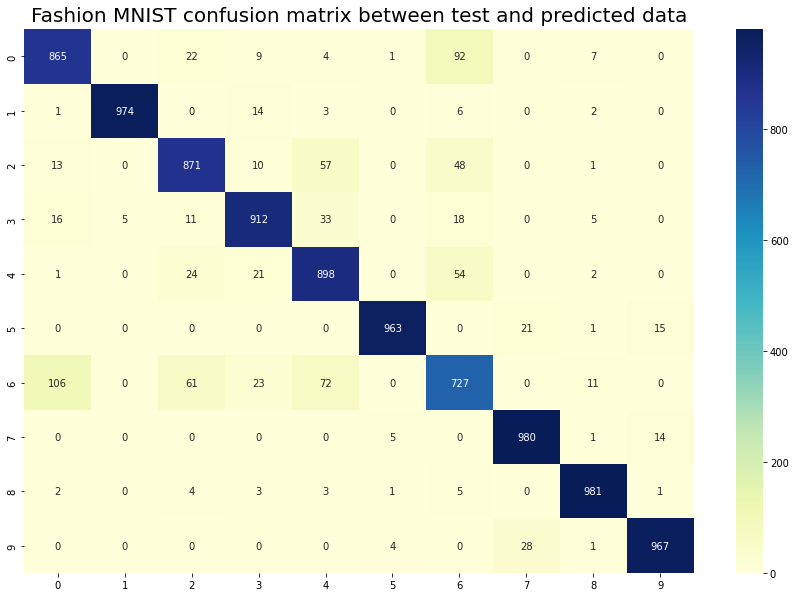

In [46]:
plt.figure(figsize=(15, 10))
heatmap_ = sns.heatmap(confusion_matrix(y_test,predictions), fmt='d', annot=True, cmap="YlGnBu")
heatmap_.set_title('Fashion MNIST confusion matrix between test and predicted data', fontdict={'fontsize':20}, pad=8 ,color='black')
plt.show()

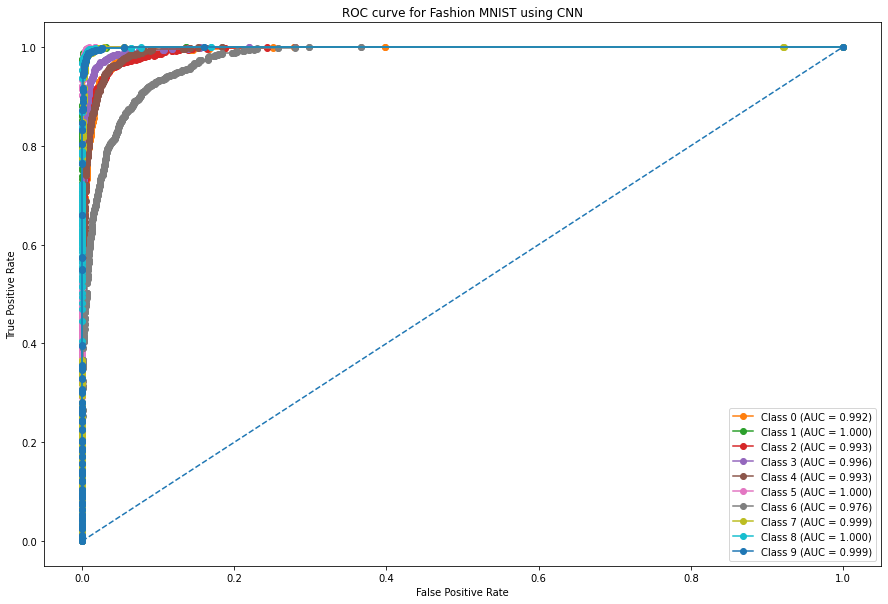

In [47]:
# Assuming y_test and yhat are properly formatted for multi-class classification
n_class = num_classes

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_class):
    # Create a one-vs-rest binary label for the current class
    y_true = (y_test == i).astype(int)
    
    # Get predicted probabilities for the current class
    y_score = predictions_prob[:, i]
    
    fpr[i], tpr[i], _ = roc_curve(y_true, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(15, 10))

# Plot the random ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')

# Plot ROC curves for each class
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], marker='o', label=f"Class {i} (AUC = {roc_auc[i]:.3f})")

plt.title('ROC curve for Fashion MNIST using CNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.legend(loc='lower right')
plt.show()


In [48]:
predictions = predictions[:10000]
y_test = y_test[:10000]
correct = np.nonzero(predictions==y_test)[0]
incorrect = np.nonzero(predictions!=y_test)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9138
Incorrect predicted classes: 862


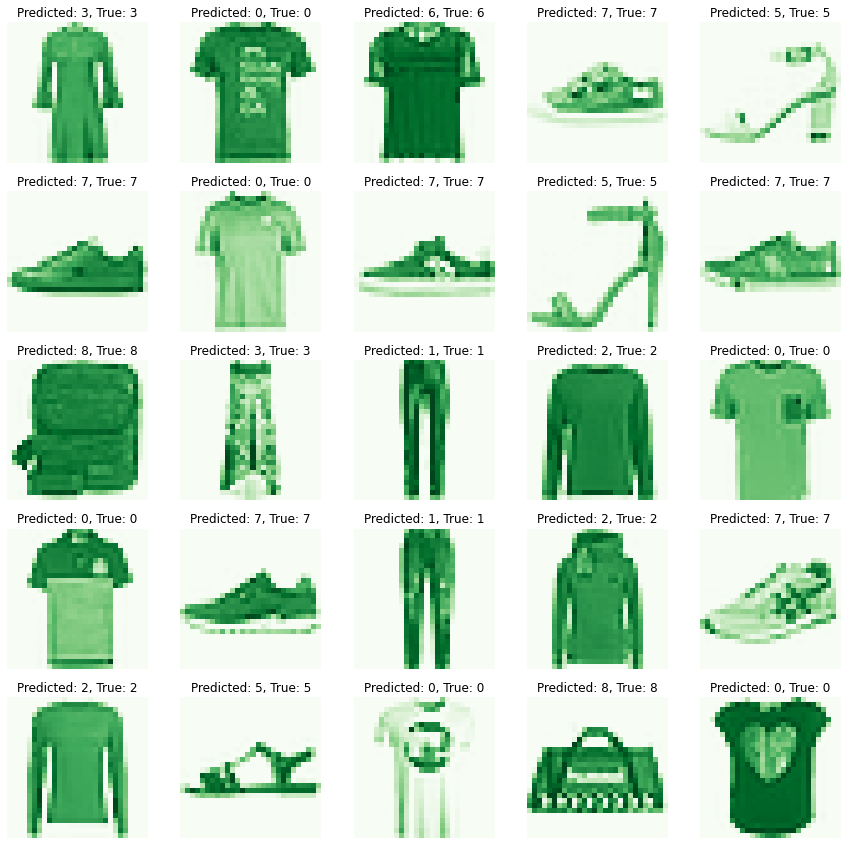

In [49]:
# Create a random sample of 10 indices from 0 to 10,000
random_indices = np.random.choice(correct, 25)
plt.figure(figsize=(15, 15))
for i, correct_index in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[correct_index].reshape(28, 28), cmap='Greens', interpolation='none')
    plt.title(f"Predicted: {predictions[correct_index]}, True: {y_test[correct_index]}")
    plt.axis('off')
plt.show()

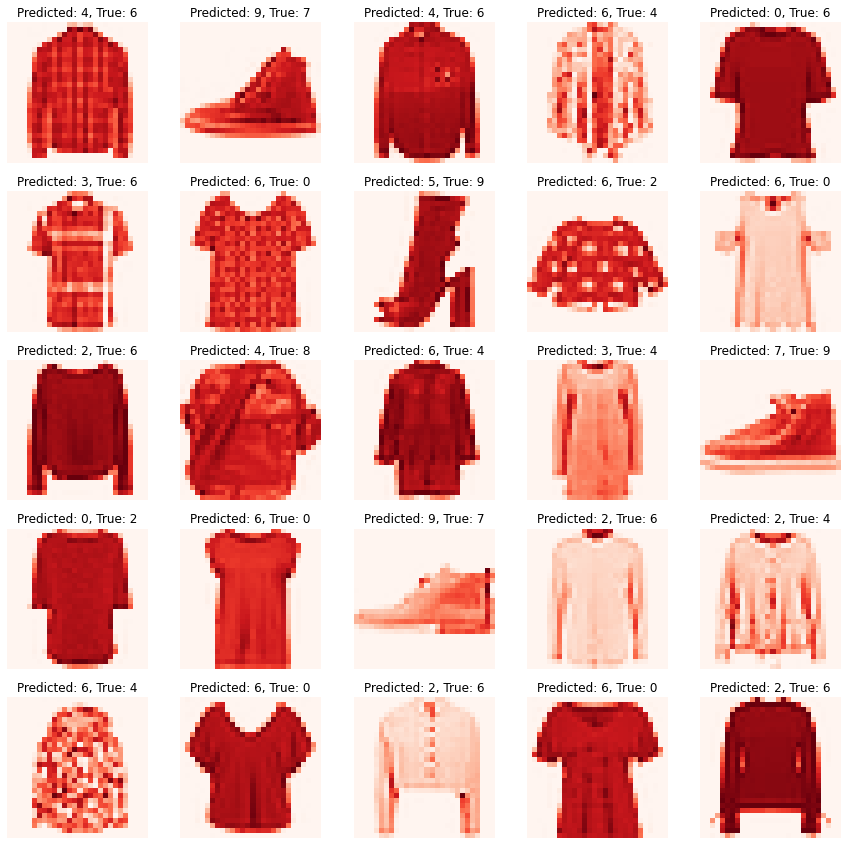

In [50]:
# Create a random sample of 10 indices from 0 to 10,000
random_indices = np.random.choice(incorrect, 25)
plt.figure(figsize=(15, 15))
for i, incorrect_index in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[incorrect_index].reshape(28, 28), cmap='Reds', interpolation='none')
    plt.title(f"Predicted: {predictions[incorrect_index]}, True: {y_test[incorrect_index]}")
    plt.axis('off')
plt.show()